<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#영화(테넷)-리뷰-감성분석" data-toc-modified-id="영화(테넷)-리뷰-감성분석-1"><center>영화(테넷) 리뷰 감성분석</center></a></span></li><li><span><a href="#프로젝트-개요" data-toc-modified-id="프로젝트-개요-2">프로젝트 개요</a></span></li><li><span><a href="#데이터-수집" data-toc-modified-id="데이터-수집-3">데이터 수집</a></span></li><li><span><a href="#개발-환경" data-toc-modified-id="개발-환경-4">개발 환경</a></span></li><li><span><a href="#1.-라이브러리" data-toc-modified-id="1.-라이브러리-5">1. 라이브러리</a></span></li><li><span><a href="#2.-데이터" data-toc-modified-id="2.-데이터-6">2. 데이터</a></span></li><li><span><a href="#3.-전처리" data-toc-modified-id="3.-전처리-7">3. 전처리</a></span><ul class="toc-item"><li><span><a href="#3.1-중복-내용-제거" data-toc-modified-id="3.1-중복-내용-제거-7.1">3.1 중복 내용 제거</a></span></li><li><span><a href="#3.2-결측치-확인" data-toc-modified-id="3.2-결측치-확인-7.2">3.2 결측치 확인</a></span></li><li><span><a href="#3.3-소문자-변환" data-toc-modified-id="3.3-소문자-변환-7.3">3.3 소문자 변환</a></span></li><li><span><a href="#3.4-개행문자-제거" data-toc-modified-id="3.4-개행문자-제거-7.4">3.4 개행문자 제거</a></span></li><li><span><a href="#3.5-한글-추출" data-toc-modified-id="3.5-한글-추출-7.5">3.5 한글 추출</a></span></li></ul></li><li><span><a href="#4.-자연어-처리" data-toc-modified-id="4.-자연어-처리-8">4. 자연어 처리</a></span><ul class="toc-item"><li><span><a href="#4.1-품사-추출" data-toc-modified-id="4.1-품사-추출-8.1">4.1 품사 추출</a></span></li><li><span><a href="#4.2-형태소-분석" data-toc-modified-id="4.2-형태소-분석-8.2">4.2 형태소 분석</a></span></li><li><span><a href="#4.3-명사-추출" data-toc-modified-id="4.3-명사-추출-8.3">4.3 명사 추출</a></span></li><li><span><a href="#4.4-TF-IDF" data-toc-modified-id="4.4-TF-IDF-8.4">4.4 TF-IDF</a></span></li></ul></li><li><span><a href="#5.-감성-분석-모델" data-toc-modified-id="5.-감성-분석-모델-9">5. 감성 분석 모델</a></span><ul class="toc-item"><li><span><a href="#5.1-토큰화" data-toc-modified-id="5.1-토큰화-9.1">5.1 토큰화</a></span><ul class="toc-item"><li><span><a href="#5.1.1-X_train-토큰화" data-toc-modified-id="5.1.1-X_train-토큰화-9.1.1">5.1.1 X_train 토큰화</a></span></li><li><span><a href="#5.1.2-X_test-토큰화" data-toc-modified-id="5.1.2-X_test-토큰화-9.1.2">5.1.2 X_test 토큰화</a></span></li></ul></li><li><span><a href="#5.2-정수-인코딩" data-toc-modified-id="5.2-정수-인코딩-9.2">5.2 정수 인코딩</a></span></li><li><span><a href="#5.3-패딩" data-toc-modified-id="5.3-패딩-9.3">5.3 패딩</a></span></li></ul></li><li><span><a href="#6.-LSTM-기반-감성분석" data-toc-modified-id="6.-LSTM-기반-감성분석-10">6. LSTM 기반 감성분석</a></span></li><li><span><a href="#7.-리뷰-예측" data-toc-modified-id="7.-리뷰-예측-11">7. 리뷰 예측</a></span></li></ul></div>

# <center>영화(테넷) 리뷰 감성분석</center>

* 분석자 : 이재성

# 프로젝트 개요

2020년 9월 29일 기준, 가장 인기있는 영화인 '테넷'의 리뷰를 바탕으로 감성분석을 실시하고자 합니다. 

# 데이터 수집

* 데이터 : 네이버 영화 페이지 내 '테넷' 리뷰 데이터 3000개 (크롤링 활용)
    
    
* 수집일 : 2020년 9월 29일

# 개발 환경

pandas == 1.0.5

numpy == 1.18.5

matplotlib == 3.2.2

seaborn == 0.10.1

eunjeon == 0.4.0

re == 2.2.1

sklearn == 0.23.1

tensorflow == 2.3.0

keras == 2.4.3

# 1. 라이브러리

In [1]:
import pandas as pd
import numpy as np
from eunjeon import Mecab
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 2. 데이터

In [2]:
movie_data = pd.read_csv('tenet_review.csv')

print(movie_data.shape)
movie_data.head(10)

(8818, 3)


,title,score,text
0,테넷,8,'놀란감독 다운 영화입니다'
1,테넷,9,'나만 그런줄 알았드니 역시 놀란 영화두번 봐야됨 ㅋ'
2,테넷,9,'초반은 누구나 재밌게볼수있지만
3,테넷,6,'아니 그래서 복권은 언제 사는데'
4,테넷,10,'과거의 내가 미래의 나를 위로하는 느낌'
5,테넷,10,'진짜 액션씬만 봐도 후회없음 물론 스토리도 매우 좋음'
6,테넷,10,'놀란 작품중 최고 좋았다. 워낙 난해하다는 평을 들어서 그닥 이해하려 노력안해서인지
7,테넷,8,'한 번에 이해할 수 없지만 이해하면 이해할 수록 스토리가 대단한 영화'
8,테넷,10,'감독 혼자만 이해하는 영화'
9,테넷,10,'뭔 내용인지 모르겠지만 재미있게 봄'


# 3. 전처리

## 3.1 중복 내용 제거

In [3]:
print('원본 포스팅 글 수 :',movie_data.shape)

movie_data.drop_duplicates(['text'], keep = 'last', inplace = True)

print('중복 제거 후 포스팅 글 수 :', movie_data.shape)

원본 포스팅 글 수 : (8818, 3)
중복 제거 후 포스팅 글 수 : (8216, 3)


## 3.2 결측치 확인

In [4]:
movie_data.isnull().sum()

title    0
score    0
text     0
dtype: int64

**결측치는 없는 것으로 나타났습니다. 그렇지만, Null 값이 없지만, 빈 값(empy) 유무도 확인해야 합니다. 모든 빈 값을 Null 값으로 변환하고, 다시 Null 값이 있는지 확인합니다.**

In [5]:
movie_data['text'].replace('', np.NaN)

movie_data.isnull().sum()

title    0
score    0
text     0
dtype: int64

**여전히 결측치가 없는 것으로 확인되었습니다. 마지막으로 단어 길이가 짧은 텍스트를 제거하겠습니다.**

In [6]:
# 텍스트 길이가 3 이하인 데이터를 출력하겠습니다.
for i in movie_data['text']:
    if len(i) <= 3:
        print(i)

 '하
 '응
 '닐
 '아
 '와
 '
 '어
 ''


**이 경우는 의미가 없는 케이스이므로 제거하겠습니다.**

In [7]:
short_list = []
for i in movie_data['text']:
    if len(i) > 3:
        short_list.append(i)
        
short_list[:10]

[" '놀란감독 다운 영화입니다'",
 " '나만 그런줄 알았드니 역시 놀란 영화두번 봐야됨 ㅋ'",
 " '초반은 누구나 재밌게볼수있지만",
 " '아니 그래서 복권은 언제 사는데'",
 " '과거의 내가 미래의 나를 위로하는 느낌'",
 " '진짜 액션씬만 봐도 후회없음 물론 스토리도 매우 좋음'",
 " '놀란 작품중 최고 좋았다. 워낙 난해하다는 평을 들어서 그닥 이해하려 노력안해서인지",
 " '한 번에 이해할 수 없지만 이해하면 이해할 수록 스토리가 대단한 영화'",
 " '감독 혼자만 이해하는 영화'",
 " '뭔 내용인지 모르겠지만 재미있게 봄'"]

In [8]:
movie_data = movie_data[movie_data['text'].isin(short_list)]

for i in movie_data['text']:
    if len(i) <= 3:
        print(i)

**다시 한 번, 길이가 3이하인 데이터를 출력하니 아무 것도 출력되지 않은 것으로 보아 성공적으로 제거됨을 확인하였습니다.**

## 3.3 소문자 변환

In [9]:
movie_data['text'] = movie_data['text'].str.lower()

## 3.4 개행문자 제거

In [10]:
movie_data['text'] = movie_data['text'].replace('\n','')

movie_data['text'].head(10)

0                                     '놀란감독 다운 영화입니다'
1                      '나만 그런줄 알았드니 역시 놀란 영화두번 봐야됨 ㅋ'
2                                   '초반은 누구나 재밌게볼수있지만
3                                 '아니 그래서 복권은 언제 사는데'
4                             '과거의 내가 미래의 나를 위로하는 느낌'
5                     '진짜 액션씬만 봐도 후회없음 물론 스토리도 매우 좋음'
6     '놀란 작품중 최고 좋았다. 워낙 난해하다는 평을 들어서 그닥 이해하려 노력안해서인지
7            '한 번에 이해할 수 없지만 이해하면 이해할 수록 스토리가 대단한 영화'
8                                    '감독 혼자만 이해하는 영화'
9                               '뭔 내용인지 모르겠지만 재미있게 봄'
Name: text, dtype: object

## 3.5 한글 추출

In [11]:
movie_data['new_text'] = movie_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

print('데이터 수 :', len(movie_data['new_text']))
movie_data['text'].head(10), movie_data['new_text'].head(10)

데이터 수 : 8208


(0                                     '놀란감독 다운 영화입니다'
 1                      '나만 그런줄 알았드니 역시 놀란 영화두번 봐야됨 ㅋ'
 2                                   '초반은 누구나 재밌게볼수있지만
 3                                 '아니 그래서 복권은 언제 사는데'
 4                             '과거의 내가 미래의 나를 위로하는 느낌'
 5                     '진짜 액션씬만 봐도 후회없음 물론 스토리도 매우 좋음'
 6     '놀란 작품중 최고 좋았다. 워낙 난해하다는 평을 들어서 그닥 이해하려 노력안해서인지
 7            '한 번에 이해할 수 없지만 이해하면 이해할 수록 스토리가 대단한 영화'
 8                                    '감독 혼자만 이해하는 영화'
 9                               '뭔 내용인지 모르겠지만 재미있게 봄'
 Name: text, dtype: object,
 0                                     놀란감독 다운 영화입니다
 1                      나만 그런줄 알았드니 역시 놀란 영화두번 봐야됨 ㅋ
 2                                  초반은 누구나 재밌게볼수있지만
 3                                 아니 그래서 복권은 언제 사는데
 4                             과거의 내가 미래의 나를 위로하는 느낌
 5                     진짜 액션씬만 봐도 후회없음 물론 스토리도 매우 좋음
 6     놀란 작품중 최고 좋았다 워낙 난해하다는 평을 들어서 그닥 이해하려 노력안해서인지
 7            한 번에 이해할 수 없지만 이해하면 이해할 수록 스토리가 대단한 영

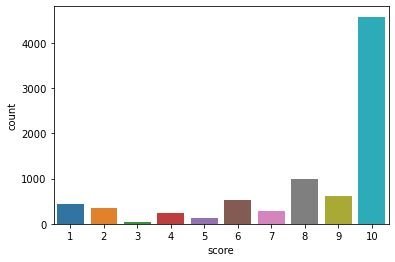

In [12]:
sns.countplot(data = movie_data, x = 'score')

**전처리가 끝난 데이터의 평점을 살펴 본 결과, 10점이 대다수인 것으로 나타났습니다.**

# 4. 자연어 처리

* 형태소 처리기 Mecab() 을 불러오겠습니다.

In [13]:
mecab = Mecab()

## 4.1 품사 추출

In [14]:
data_pos = []
for sentence in movie_data['new_text']:
    data_pos.append(mecab.pos(sentence))
data_pos[:3]

[[('놀란', 'VV+ETM'),
  ('감독', 'NNG'),
  ('다운', 'XSA+ETM'),
  ('영화', 'NNG'),
  ('입니다', 'VCP+EC')],
 [('나', 'NP'),
  ('만', 'JX'),
  ('그런', 'VA+ETM'),
  ('줄', 'NNB'),
  ('알', 'VV'),
  ('았', 'EP'),
  ('드니', 'EC'),
  ('역시', 'MAJ'),
  ('놀란', 'VV+ETM'),
  ('영화', 'NNG'),
  ('두', 'MM'),
  ('번', 'NNBC'),
  ('봐야', 'VV+EC'),
  ('됨', 'VV+ETN'),
  ('ㅋ', 'IC')],
 [('초반', 'NNG'),
  ('은', 'JX'),
  ('누구', 'NP'),
  ('나', 'JX'),
  ('재밌', 'VA'),
  ('게', 'EC'),
  ('볼', 'VX+ETM'),
  ('수', 'NNB'),
  ('있', 'VV'),
  ('지만', 'EC')]]

## 4.2 형태소 분석

In [15]:
tokenized_data = []
for sentence in movie_data['new_text']:
    for text in mecab.morphs(sentence):
        tokenized_data.append(text)
tokenized_data[:10]

['놀란', '감독', '다운', '영화', '입니다', '나', '만', '그런', '줄', '알']

* 상위 빈도 순으로 100개의 단어는 다음과 같습니다.

In [16]:
# 상위 빈도 100개 단어

top_words = Counter(tokenized_data)

top_words.most_common(100)[:10]

[('는', 5688),
 ('이', 5314),
 ('하', 4750),
 ('영화', 4550),
 ('고', 4247),
 ('다', 3582),
 ('가', 3000),
 ('이해', 2828),
 ('은', 2762),
 ('보', 2709)]

## 4.3 명사 추출

In [17]:
nouns = []
for sentence in movie_data['new_text']:
    for noun in mecab.nouns(sentence):
        nouns.append(noun)

nouns[:10]

['감독', '영화', '나', '줄', '영화', '번', '초반', '누구', '수', '복권']

In [18]:
# 상위 빈도 100개 명사

stop_words = '졸ㄹ ㅋㅋ 까지 다는 너무 네요 해서 아니 지만 재밌 는데 에서 였습니다 면서 그냥 으로 진짜 물론 워낙 수록 인지 용아 습니다 \
다시 입니다 ㅜ긴장감의 스러운 해도 졸라 근데 ㅜㅠ 나오 위한 세요 스러운 느꼈 겨를 드니 그래서 봐야 봐도 어서 하나 다기 안감 \
원다이해갖될듯 몰라도 아위 돌이 던데 이기 다면 볼지 해져서 단지 라고 이랑 대체 장리 솔직히 려고 여서 아닌 이거 다가 으면 해놨 언제 \
이게 이걸 이건 뭔가'
stop_words = stop_words.split(' ')

nouns = [word for word in nouns if word not in stop_words]
nouns = [word for word in nouns if len(word) >= 2]

top_nouns_not_stopword = Counter(nouns)

top_nouns = dict(top_nouns_not_stopword.most_common(100))

sorted(top_nouns.items(), key=lambda x: x[1], reverse=True)[:10]

[('영화', 4550),
 ('이해', 2828),
 ('감독', 1139),
 ('생각', 751),
 ('시간', 735),
 ('내용', 694),
 ('스토리', 538),
 ('놀란', 473),
 ('사람', 462),
 ('액션', 430)]

**추출된 명사의 빈도별로 살펴보면, 영화, 이해, 감독, 생각, 시간, 내용 등의 단어의 빈도가 가장 높았습니다.**

## 4.4 TF-IDF

* TF-IDF 를 계산하기 위해 scikit-learn의 TfidfVectorizer 라이브러리를 불러오겠습니다.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

review_tfidf = TfidfVectorizer().fit(top_nouns)

print(review_tfidf.transform(movie_data['new_text']).toarray())
print(review_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
TfidfVectorizer()


* 컬럼에 해당하는 단어와 리뷰문서 * 단어 행렬을 출력하겠습니다.

In [20]:
word_tfidf = review_tfidf.vocabulary_  # vocabulary_ : 각 인덱스에 해당하는 단어를 보여줍니다.

df_tfidf = pd.DataFrame(review_tfidf.transform(movie_data['new_text']).toarray())

print(sorted(word_tfidf.items()))
df_tfidf.head()

[('가능', 0), ('감독', 1), ('감동', 2), ('감탄', 3), ('개인', 4), ('건지', 5), ('과거', 6), ('과학', 7), ('관객', 8), ('관람', 9), ('극장', 10), ('기대', 11), ('기억', 12), ('내용', 13), ('놀란', 14), ('느낌', 15), ('대박', 16), ('대사', 17), ('동안', 18), ('때문', 19), ('떡밥', 20), ('마지막', 21), ('머리', 22), ('메멘토', 23), ('명작', 24), ('몰입', 25), ('물리학', 26), ('미래', 27), ('배우', 28), ('버전', 29), ('부분', 30), ('부족', 31), ('불친절', 32), ('사람', 33), ('사운드', 34), ('상상', 35), ('상상력', 36), ('생각', 37), ('설명', 38), ('설정', 39), ('세계', 40), ('세상', 41), ('소름', 42), ('소리', 43), ('소재', 44), ('수준', 45), ('순간', 46), ('스텔라', 47), ('스토리', 48), ('시간', 49), ('시작', 50), ('실망', 51), ('액션', 52), ('역행', 53), ('연기', 54), ('연출', 55), ('영상', 56), ('영상미', 57), ('영화', 58), ('영화관', 59), ('오랜만', 60), ('완벽', 61), ('우리', 62), ('음악', 63), ('이번', 64), ('이상', 65), ('이야기', 66), ('이유', 67), ('이해', 68), ('인생', 69), ('인셉션', 70), ('인터', 71), ('자신', 72), ('자체', 73), ('작품', 74), ('장면', 75), ('재미', 76), ('전개', 77), ('정도', 78), ('정신', 79), ('주인공', 80), ('중간', 81), ('중반', 82),

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 컬럼에 숫자 대신 단어로 변환시키기 위해 각 컬럼번호별 단어를 리스트로 만들겠습니다.

In [21]:
sorted_word = sorted(word_tfidf.items())

word_list = []
for word in sorted_word:
    word_list.append(word[0])

print(len(word_list))
word_list[:10]

100


['가능', '감독', '감동', '감탄', '개인', '건지', '과거', '과학', '관객', '관람']

* 컬럼을 위에서 만든 리스트로 변환하겠습니다.

In [22]:
df_tfidf.columns = word_list

df_tfidf.head()

,가능,감독,감동,감탄,개인,건지,과거,과학,관객,관람,...,크리스토퍼,타임,평점,표현,필요,해석,현재,회차,흐름,흥미
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 각 단어별 TF-IDF 값의 총합을 구한 후, 높은 순대로 출력하겠습니다.

In [23]:
df_tfidf_col_list = list(df_tfidf.columns)

df_tfidf_dict = {index : word for word, index in enumerate(df_tfidf_col_list)}

for word, idx in df_tfidf_dict.items():
    total = df_tfidf[word].sum()
    df_tfidf_dict[word] = total
    
print(df_tfidf_dict)

df_tfidf = pd.DataFrame([df_tfidf_dict])

df_tfidf = df_tfidf.T

df_tfidf.columns = ['TF-IDF']

df_tfidf = df_tfidf.sort_values(by = 'TF-IDF', ascending = False)

df_tfidf.head(20)

{'가능': 0.9472135954999579, '감독': 120.9240802269192, '감동': 14.772641167618323, '감탄': 10.439157588755425, '개인': 3.0606601717798214, '건지': 12.505800827346718, '과거': 19.065259660300377, '과학': 4.023334547203385, '관객': 11.084661635311907, '관람': 36.413957469726206, '극장': 12.299869563197348, '기대': 17.498495035992253, '기억': 2.8355491589367867, '내용': 69.88559449650025, '놀란': 513.6291659620476, '느낌': 72.53652955266907, '대박': 28.915622632863972, '대사': 13.143854890571413, '동안': 14.052212341053657, '때문': 1.2581988897471612, '떡밥': 12.853949231522027, '마지막': 61.77469512402407, '머리': 28.08725886405221, '메멘토': 18.409938961900707, '명작': 22.81999095630891, '몰입': 3.1153550716504106, '물리학': 19.25208792803123, '미래': 12.439543180393162, '배우': 2.121320343559643, '버전': 1.7071067811865475, '부분': 4.480710567046415, '부족': 1.5517182922885975, '불친절': 4.418410714806935, '사람': 25.8715541856706, '사운드': 22.97720443570924, '상상': 5.2696754483369155, '상상력': 11.678884241376089, '생각': 28.796083774431818, '설명': 12.78722383594

,TF-IDF
영화,1041.026418
놀란,513.629166
이해,235.019495
크리스토퍼,126.718175
스토리,124.880225
감독,120.924080
시간,110.382857
인셉션,97.588165
느낌,72.536530
평점,71.252015


**영화 테넷의 리뷰 중 TF-IDF 값이 가장 높은 단어는 영화(1041.026)인 것으로 나타났습니다. 다음으로, 놀란(513.629), 이해(235.02), 크리스토퍼(126.718) 등의 순으로 나타났습니다.**

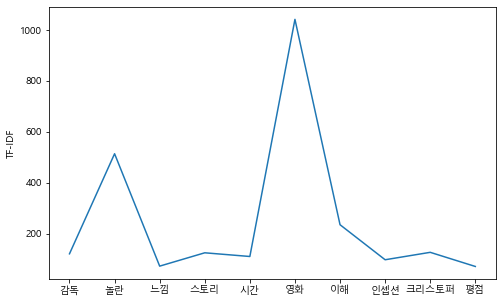

In [24]:
# TF-IDF 값 상위 10개 단어 시각화

plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = (8, 5))

top_10 = df_tfidf.head(10)

sns.lineplot(data = top_10, x = top_10.index, y = 'TF-IDF')

# 5. 감성 분석 모델

In [25]:
movie_data

,title,score,text,new_text
0,테넷,8,'놀란감독 다운 영화입니다',놀란감독 다운 영화입니다
1,테넷,9,'나만 그런줄 알았드니 역시 놀란 영화두번 봐야됨 ㅋ',나만 그런줄 알았드니 역시 놀란 영화두번 봐야됨 ㅋ
2,테넷,9,'초반은 누구나 재밌게볼수있지만,초반은 누구나 재밌게볼수있지만
3,테넷,6,'아니 그래서 복권은 언제 사는데',아니 그래서 복권은 언제 사는데
4,테넷,10,'과거의 내가 미래의 나를 위로하는 느낌',과거의 내가 미래의 나를 위로하는 느낌
...,...,...,...,...
8813,테넷,10,'여러분 저만 어렵고 이해 안된거 아니죠?놀란이 만든 논란의 영화네요~',여러분 저만 어렵고 이해 안된거 아니죠놀란이 만든 논란의 영화네요
8814,테넷,8,'역시 이해 할 수 없는 크리스토퍼 놀란의 세계',역시 이해 할 수 없는 크리스토퍼 놀란의 세계
8815,테넷,10,'역시나 놀란감독의 영화.. 대단했다. 머리속에서 어떻게 이런 시나리오가 나오는지...,역시나 놀란감독의 영화 대단했다 머리속에서 어떻게 이런 시나리오가 나오는지 그저 ...
8816,테넷,9,'이해 못 해도 재밌다. 하지만 이해 한다면 훨씬 재밌을 것이다. 좀만 더 쉽게 ...,이해 못 해도 재밌다 하지만 이해 한다면 훨씬 재밌을 것이다 좀만 더 쉽게 만들어...


## 5.1 토큰화

* 토큰화를 하기 전, 훈련 데이터+정답 그리고 검사 데이터+정답을 나누기 위해 train_test_split 을 불러오겠습니다.

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(movie_data['new_text'], movie_data['score'], test_size = 0.2, random_state=2020)

In [27]:
print(f'훈련 데이터 수 : {len(x_train)}, 정답 수 : {len(y_train)}')
print(f'검사 데이터 수 : {len(x_test)}, 정답 수 : {len(y_test)}')

훈련 데이터 수 : 6566, 정답 수 : 6566
검사 데이터 수 : 1642, 정답 수 : 1642


* 각각 데이터와 정답 수가 일치합니다.

### 5.1.1 X_train 토큰화

* 토큰화 함수를 생성하겠습니다.

In [28]:
def tokenization(x):
    token = []
    for sentence in x:
        temp = []
        temp = mecab.morphs(sentence)
        temp = [word for word in temp if word not in stop_words]
        token.append(temp)
    return token

In [29]:
X_train = tokenization(x_train)

X_train[:5]

[['술', '은', '먹', '었'],
 ['나', '는', '내일', '어제', '의', '너', '와', '만난다'],
 ['이해',
  '가',
  '안',
  '가',
  '재미',
  '있',
  '었',
  '다',
  '그게',
  '가능',
  '함',
  '그런',
  '분',
  '들',
  '이',
  '매우',
  '많',
  '네여',
  '제눈',
  '앞',
  '에',
  '는',
  '벌거벗',
  '은',
  '임금',
  '님',
  '만',
  '보였'],
 ['두', '번', '은', '보'],
 ['미치',
  '겠',
  '다',
  '보고',
  '집',
  '에',
  '와서',
  '하',
  '는',
  '일',
  '이',
  '는',
  '머릿속',
  '정리',
  '하',
  '고',
  '또',
  '정리',
  '하',
  '는',
  '것',
  '밖에',
  '없',
  '음',
  '그게',
  '짜릿',
  '함',
  'ㅠㅠ']]

### 5.1.2 X_test 토큰화

In [30]:
X_test = tokenization(x_test)

X_test[:3]

[['졸', 'ㄹ', '오', '두', '번', '보', '고', '옴'],
 ['일어난',
  '일',
  '은',
  '일어난',
  '것',
  '내',
  '가',
  '영화',
  '랑',
  '같이',
  '가',
  '는',
  '게',
  '라',
  '이',
  '영화',
  '가',
  '이끄',
  '는',
  '대로',
  '맡기',
  '고',
  '따라가',
  '는',
  '게',
  '낫',
  '겠',
  '다',
  '그리고',
  '한번',
  '볼',
  '게',
  '라',
  '몇',
  '번',
  '은',
  '봐야겠다고',
  '생각',
  '함'],
 ['평점',
  '허세',
  '들',
  '보',
  '면',
  '짜증',
  '난다',
  'ㅡㅡ',
  '이해',
  '안',
  '되',
  '한번',
  '더',
  '보',
  '는',
  '거',
  '지',
  '한번',
  '더',
  '보',
  '는',
  '건',
  '거',
  '같',
  '다',
  '뿌린',
  '떡밥',
  '이',
  '딱딱',
  '맞',
  '아',
  '떨어질',
  '때',
  '영화',
  '의',
  '재미',
  '가',
  '더',
  '해',
  '지',
  '뭐',
  '맞',
  '아',
  '떨어져도',
  '절반',
  '이상',
  '이',
  '이해',
  '가',
  '안',
  '가',
  '니',
  '재미',
  '도',
  '없',
  '고',
  '한번',
  '더',
  '볼',
  '만',
  '한',
  '영화',
  '는',
  '아님',
  '두',
  '번',
  '본다고',
  '이해',
  '될',
  '거',
  '같',
  '지',
  '도',
  '않',
  '고']]

## 5.2 정수 인코딩

* 컴퓨터가 처리할 수 있도록 텍스트를 정수로 인코딩하는 작업을 수행하겠습니다.

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

* fit_on_texts() 함수를 활용하여 빈도 기반 단어별 인덱스를 설정하겠습니다. 

In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 

In [33]:
# print(tokenizer.word_index)  # 각 단어별 인덱스

sorted(tokenizer.word_index.items(), key=lambda x: x[1], reverse=False)[:10]

[('는', 1),
 ('이', 2),
 ('하', 3),
 ('영화', 4),
 ('고', 5),
 ('다', 6),
 ('가', 7),
 ('이해', 8),
 ('은', 9),
 ('보', 10)]

* 위에서 낮은 인덱스의 단어가 고빈도를 의미하며, 높은 인덱스의 단어가 저빈도입니다. 


* 본 프로젝트에서는 빈도가 3회 미만인 단어들을 제외할 것이며, 이를 제외하면 몇 개의 데이터가 남는지를 살펴보겠습니다.

In [34]:
threshold = 3
total_word_num = len(tokenizer.word_index)  # 단어 수
low_freq_num = 0   # threshold 보다 작은 단어의 수
freq_sum = 0       # 전체 단어의 빈도
low_freq_sum = 0   # threshold보다 작은 단어의 총 빈도

for key, value in tokenizer.word_counts.items():  # tokenizer.word_counts : 각 단어별 빈도
    freq_sum += value
    
    # 단어의 빈도가 threshold보다 작은 경우
    if value < threshold:
        low_freq_num += 1
        low_freq_sum += value
        
print('단어집합 크기 :', total_word_num)
print('빈도가 3 미만인 단어 수 :', low_freq_num)
print(f'빈도가 3 미만인 단어 비율 :{(low_freq_num / total_word_num) * 100:.2f}%')

단어집합 크기 : 8003
빈도가 3 미만인 단어 수 : 5133
빈도가 3 미만인 단어 비율 :64.14%


**총 단어집합 크기는 8003 이며, 빈도가 3 미만인 단어 비율은 64.14%로 절반 이상인 것으로 나타났습니다.**

In [35]:
# 전체 단어 개수 중 빈도가 3 미만인 단어 개수 제거하겠습니다.
# 0번 패딩 토큰과 1번 OOV 토큰(OOV : 기타단어)을 고려하여 +2 하겠습니다.

vocab_size = total_word_num - low_freq_num + 2
print('단어 집합 크기 :', vocab_size)

단어 집합 크기 : 2872


* 감성 분석에 사용될 vocab_size는 2872 입니다. 이를 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환합니다. 이러한 정수 인코딩 과정에서 이보다 큰 숫자가 부여된 단어들은 OOV로 변환하겠습니다. 다시 말해 정수 1번으로 할당합니다.

In [36]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)

# 훈련 데이터를 텍스트에서 정수로 변환하겠습니다.
X_train = tokenizer.texts_to_sequences(X_train)

# 검사 데이터를 텍스트에서 정수로 변환하겠습니다.
X_test = tokenizer.texts_to_sequences(X_test)

In [37]:
print(X_train[:5])

[[1, 10, 488, 32], [36, 2, 434, 465, 15, 379, 63, 750], [9, 8, 26, 8, 106, 21, 32, 7, 655, 346, 68, 259, 135, 22, 3, 335, 111, 1087, 1, 359, 13, 2, 1, 10, 1, 183, 34, 1338], [72, 23, 10, 11], [877, 39, 7, 305, 310, 13, 841, 4, 2, 121, 3, 2, 963, 772, 4, 6, 71, 772, 4, 2, 35, 236, 30, 27, 655, 1019, 68, 194]]


In [38]:
print(X_test[:5])

[[318, 471, 243, 72, 23, 11, 6, 983], [344, 121, 10, 344, 35, 75, 8, 5, 249, 386, 8, 2, 17, 73, 3, 5, 8, 1, 2, 610, 2128, 6, 395, 2, 17, 1145, 39, 7, 178, 104, 67, 17, 73, 247, 23, 10, 1, 44, 68], [123, 753, 22, 11, 28, 747, 992, 970, 9, 26, 29, 104, 48, 11, 2, 25, 20, 104, 48, 11, 2, 101, 25, 31, 7, 1, 374, 3, 2544, 219, 51, 1, 80, 5, 15, 106, 8, 48, 70, 20, 120, 219, 51, 1, 984, 186, 3, 9, 8, 26, 8, 114, 106, 16, 30, 6, 104, 48, 67, 34, 14, 5, 2, 600, 72, 23, 1366, 9, 134, 25, 31, 20, 16, 53, 6], [44, 4, 6], [19, 15, 1878, 10, 627]]


**X_train과 X_test 모두 성공적으로 변환되었습니다.**

* 이제는 label 값을 긍정, 부정 binary 형태로 만들기 위해 7점 이상은 긍정(1), 6점 이하는 부정(0)으로 변환하겠습니다.

In [39]:
def rating(x):
    if x >= 7:
        return 1
    else:
        return 0

In [40]:
y_train_binary = y_train.apply(rating)
y_test_binary = y_test.apply(rating)

In [41]:
y_train, y_train_binary

(201     10
 5515    10
 7574     1
 1467    10
 859     10
         ..
 4621     7
 3975    10
 1804    10
 2324     1
 8080     9
 Name: score, Length: 6566, dtype: int64,
 201     1
 5515    1
 7574    0
 1467    1
 859     1
        ..
 4621    1
 3975    1
 1804    1
 2324    0
 8080    1
 Name: score, Length: 6566, dtype: int64)

In [42]:
y_test, y_test_binary

(1966    10
 8444    10
 1157     6
 8595     8
 1163     8
         ..
 875      1
 4000    10
 6542     6
 3835    10
 642     10
 Name: score, Length: 1642, dtype: int64,
 1966    1
 8444    1
 1157    0
 8595    1
 1163    1
        ..
 875     0
 4000    1
 6542    0
 3835    1
 642     1
 Name: score, Length: 1642, dtype: int64)

**훈련 및 검사 레이블 모두 binary 형태로 변환되었습니다.**

In [43]:
# label 을 모델링 과정에 활용하기 위해 배열 형태로 변환하겠습니다.
y_train = np.array(y_train_binary)
y_test = np.array(y_test_binary)

In [44]:
# 훈련 데이터에 빈 값을 찾겠습니다.
drop_idx = []
for idx, sen in enumerate(X_train):
    if len(sen) < 1:
        drop_idx.append(idx)
        
print(len(drop_idx))
drop_idx

37


[110,
 428,
 453,
 590,
 657,
 754,
 786,
 936,
 1150,
 1786,
 1795,
 1885,
 1926,
 2306,
 2631,
 2641,
 3261,
 3467,
 3616,
 3923,
 4012,
 4238,
 4364,
 4474,
 4582,
 4642,
 4664,
 4974,
 5001,
 5022,
 5188,
 5192,
 5211,
 5506,
 5555,
 5932,
 6359]

**빈 값의 개수는 37개이며, 인덱스는 위와 같습니다.**

In [45]:
print('인덱스 삭제 전 :', len(X_train))
print('인덱스 삭제 전 :', len(y_train))

인덱스 삭제 전 : 6566
인덱스 삭제 전 : 6566


In [46]:
X_train = np.delete(X_train, drop_idx, axis = 0)
print('인덱스 삭제 후 :', len(X_train))

인덱스 삭제 후 : 6529


In [47]:
y_train = np.delete(y_train, drop_idx)
print('인덱스 삭제 후 :', len(y_train))

인덱스 삭제 후 : 6529


In [48]:
# 검사 데이터에 빈 값을 찾겠습니다.
drop_idx = []
for idx, sen in enumerate(X_test):
    if len(sen) < 1:
        drop_idx.append(idx)
        
print(len(drop_idx))
drop_idx

9


[82, 158, 442, 840, 867, 897, 917, 1010, 1371]

In [49]:
print('인덱스 삭제 전 :', len(X_test))
print('인덱스 삭제 전 :', len(y_test))

인덱스 삭제 전 : 1642
인덱스 삭제 전 : 1642


In [50]:
X_test = np.delete(X_test, drop_idx, axis = 0)
print('인덱스 삭제 후 :', len(X_test))

인덱스 삭제 후 : 1633


In [51]:
y_test = np.delete(y_test, drop_idx)
print('인덱스 삭제 후 :', len(y_test))

인덱스 삭제 후 : 1633


## 5.3 패딩

* 패딩 작업을 통해 서로 다른 길이의 리스트 길이를 동일하게 맞추겠습니다.


* 패딩 작업을 위해 pad_sequences 라이브러리를 활용하겠습니다.

In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
print('리뷰의 최대 길이 :', max(len(length) for length in X_train))
print('리뷰의 평균 길이 :', sum(map(len, X_train)) / len(X_train))

리뷰의 최대 길이 : 470
리뷰의 평균 길이 : 21.43544187471282


Text(0, 0.5, '샘플 수')

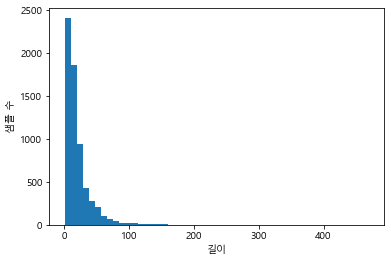

In [54]:
plt.hist([len(length) for length in X_train], bins = 50)
plt.xlabel('길이')
plt.ylabel('샘플 수')

* 가장 긴 리뷰의 길이는 470이며, 평균 리뷰 길이는 약 21 내외의 길이를 가지는 것을 볼 수 있습니다. 


* 모델이 처리할 수 있도록 X_train과 X_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞춰줄 필요가 있습니다. 특정 길이 변수를 max_len으로 정합니다.

대부분의 리뷰가 내용이 잘리지 않도록 할 수 있는 최적의 max_len의 값을 확인하는 함수를 만들겠습니다.

In [55]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for i in nested_list:
        if len(i) <= max_len:
            count += 1
    return count / len(nested_list) * 100

In [56]:
below_threshold_len(70, X_train)

96.29345994792465

**길이를 70으로 하니 약 96% 리뷰 데이터는 원본 그대로 모델링에 활용할 수 있는 것으로 나타났습니다. 이 결과를 바탕으로 X_train과 X_test의 길이를 70으로 맞추겠습니다.**

In [57]:
X_train = pad_sequences(X_train, maxlen = 70)
X_test = pad_sequences(X_test, maxlen = 70)

# 6. LSTM 기반 감성분석

In [58]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [59]:
model = Sequential()  # Sequential() 함수를 통해 인공신경망 학습에 필요한 층을 구성하겠습니다.
model.add(Embedding(vocab_size, 128))  # 단어집합을 위에서 계산한 vocab_size만큼 임베딩하여 100차원의 벡터로 출력하겠습니다.
model.add(LSTM(128))  # LSTM 레이어 크기를 128 차원으로 설정하겠습니다.
model.add(Dense(1, activation = 'sigmoid')) # 출력은 0과 1 중에 하나이므로 1, activation 함수에는 sigmoid를 입력하겠습니다.

EarlyStopping 은 훈련 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료시키는 라이브러리입니다. 또한, ModelCheckpoint를 사용하여 훈련 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.

In [60]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

에포크는 총 10번을 수행하겠습니다. 또한 훈련 데이터 중 20%를 검증 데이터로 사용하면서 정확도를 확인합니다.

In [61]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 20, callbacks = [es, mc], batch_size = 70, validation_split = 0.2)

Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 0.4969 - acc: 0.7856
Epoch 00001: val_acc improved from -inf to 0.78254, saving model to best_model.h5
75/75 [==============================] - 11s 143ms/step - loss: 0.4969 - acc: 0.7856 - val_loss: 0.4899 - val_acc: 0.7825
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.3504 - acc: 0.8464
Epoch 00002: val_acc improved from 0.78254 to 0.81317, saving model to best_model.h5
75/75 [==============================] - 9s 120ms/step - loss: 0.3504 - acc: 0.8464 - val_loss: 0.4011 - val_acc: 0.8132
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.2761 - acc: 0.8888
Epoch 00003: val_acc did not improve from 0.81317
75/75 [==============================] - 8s 112ms/step - loss: 0.2761 - acc: 0.8888 - val_loss: 0.4224 - val_acc: 0.8032
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 0.2144 - acc: 0.9150
Epoch 00004: val_acc improved from 0.81317 to 0.81394, saving m

* 조기 종료 조건에 정상적으로 학습이 종료되었습니다. 학습결과, 약 82%의 모델 정확도를 보였습니다. 

* best_model.h5에 저장된 모델을 바탕으로 검사 데이터의 정확도를 측정하겠습니다.

In [62]:
loaded_model = load_model('best_model.h5')
print(f'모델 정확도 : {loaded_model.evaluate(X_test, y_test)[1]:.2f}')

52/52 [==============================] - 1s 18ms/step - loss: 0.4414 - acc: 0.8175
모델 정확도 : 0.82


* 검사 데이터를 활용하여 모델을 수행하니 약 82%의 정확도를 나타냈습니다.

# 7. 리뷰 예측

* 리뷰 예측 함수를 만들어 다른 영화의 리뷰 문장으로 감성 분석을 실시하겠습니다.

In [63]:
def sentiment_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if word not in stop_words]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = 70)
    score = float(loaded_model.predict(pad_new))
    if score > 0.5:
        predict = f'{score * 100:.2f}% 확률로 긍정 리뷰입니다.'
        
    else:
        predict = f'{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.'
      
    return predict

* 타 애니메이션 리뷰로 해당 감성분석 모델을 수행하겠습니다.

In [64]:
reviews = pd.read_csv('review.csv')
test = reviews.head(20)

for text in test['text']:
    if len(text) > 3:
        print('문장 :', text)
        print(sentiment_predict(text))
        print()

문장 :  '이번 극장판에서는 엉덩이 탐정아버지가 나오는 극장판 재밌을 것 같고 새로운 사건과 추리 이번에도 잘 풀었으면 좋겠습니다 사랑해요'
92.48% 확률로 긍정 리뷰입니다.

문장 :  '자칭 대가리 깨진 애국자님들은 기기괴괴 어쩌고나 쳐봐라'
76.57% 확률로 부정 리뷰입니다.

문장 :  '재밌었습니다 다만 괴도 유의 분량이 좀 없는게 아쉬웠습니다'
76.18% 확률로 긍정 리뷰입니다.

문장 :  '엉덩이 탐정 캐릭터에 반해서 홀린듯이 구매해서 봤습니다!애들 보는 만화일줄 알고 별로 큰 기대는 하지 않았는데 생각보다 스토리도 탄탄하고 옆에서 감초역할을 하는 캐릭터들도 개성이 살아있어서 시간가는 줄 모르고 봤네여집중력 딸리는 제 조카도 한시도 한눈 안팔고 보더라구여 ㅋㅋ '
66.29% 확률로 부정 리뷰입니다.

문장 :  '아이들이 넘 좋아하는 엉탐!   책보다 더 흥미진진한 이야기들로 가득하겠죠?!'
93.90% 확률로 긍정 리뷰입니다.

문장 :  '너무 기다렸던 엉덩이탐정! 개봉일 맞춰서 바로 vod로 다운받았습니다! 새로운 사건과 추리가 흥미진진하네요 최고입니다!!'
99.89% 확률로 긍정 리뷰입니다.

문장 :  '아이랑 손꼽아 기다린 엉덩이탐정^^ 방방뛰고 노래부르고 재밌게 봣어요 또보자고 해서 여러번집에서도 볼꺼같아요'
67.36% 확률로 긍정 리뷰입니다.

문장 :  '엉덩이 탐정이 두마리나 되니 애들이 두배로 조아해요 ㅋㅋㅋㅋ'
99.17% 확률로 긍정 리뷰입니다.

문장 :  '엉덩이보단 나은 영화'
94.57% 확률로 긍정 리뷰입니다.

문장 :  '한국판 비긴어게인이라는 묘사를 듣고
61.59% 확률로 긍정 리뷰입니다.

문장 :  '가을과 너무 찰떡인 영화. 어디서 그런 친구들을 캐스팅한거죠... 음악도 너무 좋음!'
79.79% 확률로 부정 리뷰입니다.

문장 :  '음악으로 만난 소중한 인연들과 음악으로 승화하다.'
84.31% 확률로 긍정 리뷰입니다.

문장 :  '일단 음악 영화답게 OST가 정말 좋아요. 노래 한